In [1]:
import numpy as np
import pandas as pd

import sys
from os.path import join as opj

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from fg_shared import _fg_data

In [46]:
data_folder = opj(_fg_data, 'SEATRAC/TB_hackday_2023/seatrac-hackday-2023/darrah_etal')

md = pd.read_csv(opj(data_folder, 'updated_alexandria_metadata.txt'), sep='\t', low_memory=False)
md = md.iloc[1:]

md_cols = ['sampleid', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label',
           'sex', 'biosample_id', 'cell_type__ontology_label', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute',
           'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'vaccination_route',
           'vaccination__time_since', 'vaccination__time_since__unit','vaccination__dosage']
md = md.assign(sampleid=md.apply(lambda r: f'D{r["donor_id"]}_WK{r["vaccination__time_since"]}_STIM{r["Stimulated"]}', axis=1))
md = md[md_cols].drop_duplicates()

cts = pd.read_csv(opj(data_folder, 'pseudo_bulk_wk13_wk25.csv'))

In [47]:
md

,sampleid,organ__ontology_label,vaccination,vaccination__ontology_label,sex,biosample_id,cell_type__ontology_label,disease__ontology_label,donor_id,Stimulated,VaccineRoute,VaccineRouteUnique,VaccineRouteUniqueGroup,vaccination_route,vaccination__time_since,vaccination__time_since__unit,vaccination__dosage
1,DDF16_WK13_STIMYES,lung,VO_0000771,BCG vaccine,unknown,Week13YESDF16,macrophage,disease or disorder,DF16,YES,IDLow,IDLow-DF16,1_IDLow-DF16,intradermal,13,UO_0000034,Low
7,DDF16_WK13_STIMYES,lung,VO_0000771,BCG vaccine,unknown,Week13YESDF16,mast cell,disease or disorder,DF16,YES,IDLow,IDLow-DF16,1_IDLow-DF16,intradermal,13,UO_0000034,Low
8,DDF16_WK13_STIMYES,lung,VO_0000771,BCG vaccine,unknown,Week13YESDF16,T cell,disease or disorder,DF16,YES,IDLow,IDLow-DF16,1_IDLow-DF16,intradermal,13,UO_0000034,Low
16,DDF16_WK13_STIMYES,lung,VO_0000771,BCG vaccine,unknown,Week13YESDF16,eosinophil,disease or disorder,DF16,YES,IDLow,IDLow-DF16,1_IDLow-DF16,intradermal,13,UO_0000034,Low
27,DDF16_WK13_STIMYES,lung,VO_0000771,BCG vaccine,unknown,Week13YESDF16,B cell,disease or disorder,DF16,YES,IDLow,IDLow-DF16,1_IDLow-DF16,intradermal,13,UO_0000034,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161376,DOVN_WK25_STIMNO,lung,VO_0000771,BCG vaccine,unknown,Week25NOOVN,macrophage,disease or disorder,OVN,NO,IDHigh,IDHigh-OVN,3_IDHigh-OVN,intradermal,25,UO_0000034,High
161388,DOVN_WK25_STIMNO,lung,VO_0000771,BCG vaccine,unknown,Week25NOOVN,neutrophil,disease or disorder,OVN,NO,IDHigh,IDHigh-OVN,3_IDHigh-OVN,intradermal,25,UO_0000034,High
161426,DOVN_WK25_STIMNO,lung,VO_0000771,BCG vaccine,unknown,Week25NOOVN,eosinophil,disease or disorder,OVN,NO,IDHigh,IDHigh-OVN,3_IDHigh-OVN,intradermal,25,UO_0000034,High
161515,DOVN_WK25_STIMNO,lung,VO_0000771,BCG vaccine,unknown,Week25NOOVN,B cell,disease or disorder,OVN,NO,IDHigh,IDHigh-OVN,3_IDHigh-OVN,intradermal,25,UO_0000034,High


In [49]:
md['cell_type__ontology_label'].unique()

array(['macrophage', 'mast cell', 'T cell', 'eosinophil', 'B cell',
       'epithelial cell', 'neutrophil'], dtype=object)

In [6]:
cts = cts.rename({'Unnamed: 0':'Gene'}, axis=1).set_index('Gene')

"""Apply transformation to compute log2-transcripts per million using a pseudocount.
This is also how voom computes log2-CPM, but does not provide inverse variance weights as voom does"""
pseudo_ct = 0.5
ltpm = np.log2(1e6 * (cts + pseudo_ct) / (cts + pseudo_ct).values.sum(axis=0, keepdims=True))

In [13]:
ltpm

,DDF16_WK13_STIMNO_B cell,DDF16_WK13_STIMNO_T cell,DDF16_WK13_STIMNO_eosinophil,DDF16_WK13_STIMNO_epithelial cell,DDF16_WK13_STIMNO_macrophage,DDF16_WK13_STIMNO_mast cell,DDF16_WK13_STIMNO_neutrophil,DDF16_WK13_STIMYES_B cell,DDF16_WK13_STIMYES_T cell,DDF16_WK13_STIMYES_eosinophil,...,DOVN_WK25_STIMNO_macrophage,DOVN_WK25_STIMNO_mast cell,DOVN_WK25_STIMNO_neutrophil,DOVN_WK25_STIMYES_B cell,DOVN_WK25_STIMYES_T cell,DOVN_WK25_STIMYES_eosinophil,DOVN_WK25_STIMYES_epithelial cell,DOVN_WK25_STIMYES_macrophage,DOVN_WK25_STIMYES_mast cell,DOVN_WK25_STIMYES_neutrophil
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,1.127614,-2.570574,-0.820605,-0.020015,-2.209359,-2.924373,3.227665,2.088101,-2.882676,-1.548662,...,0.214268,1.685227,4.608443,4.267788,-0.224999,3.039951,3.544224,-0.158062,1.354664,4.648263
A1CF,1.127614,-2.570574,-0.820605,-0.020015,-6.116250,-2.924373,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-0.158062,1.354664,4.648263
A2M,7.841860,8.442749,8.148062,8.350672,7.784145,7.509212,8.181861,7.702811,8.527246,8.395318,...,2.284657,1.685227,4.608443,7.075143,6.615464,5.361879,7.451115,7.219871,6.212645,4.648263
A2ML1,1.127614,-0.248646,-0.820605,-0.020015,-3.308895,-0.602445,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-0.158062,1.354664,4.648263
A3GALT2,1.127614,-2.570574,-0.820605,-0.020015,-6.116250,-1.339411,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-1.743025,1.354664,4.648263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIR876,1.127614,-2.570574,-0.820605,-0.020015,-6.116250,-2.924373,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-1.743025,1.354664,4.648263
MIR892A,1.127614,-2.570574,-0.820605,-0.020015,-6.116250,-2.924373,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-1.743025,1.354664,4.648263
MIR92B,1.127614,-2.570574,-0.820605,-0.020015,-6.116250,-2.924373,3.227665,2.088101,-2.882676,-1.548662,...,-2.107660,1.685227,4.608443,4.267788,-2.546928,3.039951,3.544224,-1.743025,1.354664,4.648263


Text(0.5, 1.0, 'Expression of top 20 genes in T cells')

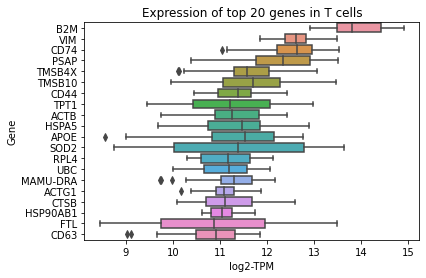

In [16]:
tot = ltpm.sum(axis=1)
sorti = np.argsort(tot.values)[::-1]

plot_df = ltpm.iloc[sorti[:20], :]
plot_df = plot_df[[c for c in ltpm.columns if 'T cell' in c]]
plot_df = plot_df.stack().reset_index().rename({'level_1':'sampleid', 0:'log2-TPM'}, axis=1)
sns.boxplot(y='Gene', x='log2-TPM', data=plot_df)
plt.title('Expression of top 20 genes in T cells')

In [32]:
plot_df = ltpm.T
plot_df.index = plot_df.index.str.split('_', expand=True)
plot_df = plot_df.reset_index().rename({'level_0':'Donor', 'level_1':'Week', 'level_2':'Stim', 'level_3':'Cell type'}, axis=1)
    
genes = ['IFNG', 'STAT1']
plot_df = plot_df.set_index(['Donor', 'Week', 'Stim', 'Cell type'])[genes].stack().reset_index().rename({0:'log2-TPM'}, axis=1)
plot_df

,Donor,Week,Stim,Cell type,Gene,log2-TPM
0,DDF16,WK13,STIMNO,B cell,IFNG,1.127614
1,DDF16,WK13,STIMNO,B cell,STAT1,8.734944
2,DDF16,WK13,STIMNO,T cell,IFNG,3.312069
3,DDF16,WK13,STIMNO,T cell,STAT1,9.320830
4,DDF16,WK13,STIMNO,eosinophil,IFNG,0.764358
...,...,...,...,...,...,...
827,DOVN,WK25,STIMYES,macrophage,STAT1,9.253449
828,DOVN,WK25,STIMYES,mast cell,IFNG,5.602591
829,DOVN,WK25,STIMYES,mast cell,STAT1,10.092756
830,DOVN,WK25,STIMYES,neutrophil,IFNG,4.648263


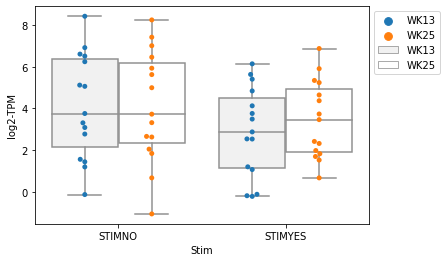

In [43]:
params = dict(x='Stim', y='log2-TPM', hue='Week', data=plot_df.loc[(plot_df['Gene'] == 'IFNG') & (plot_df['Cell type'] == 'T cell')])
sns.swarmplot(dodge=True, **params)
sns.boxplot(fliersize=0, color='white', **params)
plt.legend(bbox_to_anchor=(1, 1))

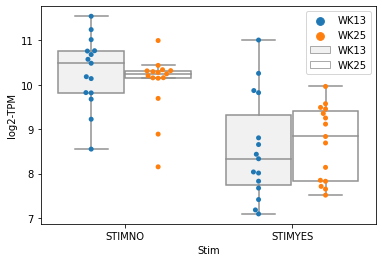

In [51]:
params = dict(x='Stim', y='log2-TPM', hue='Week', data=plot_df.loc[(plot_df['Gene'] == 'STAT1') & (plot_df['Cell type'] == 'macrophage')])
sns.swarmplot(dodge=True, **params)
sns.boxplot(fliersize=0, color='white', **params)
plt.legend(bbox_to_anchor=(1, 1))